# Import the library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

=A2*0.01+0.1*B2+C2*5+5+RAND()*5, the real parameters is 0.01, 0.1 ,and 5

# Read the synthetic data

In [62]:
dataku = pd.read_excel("sintetik_multivariate_linear.xlsx")
dataku.head()

,persons,luas,lantai,penghasilan
0,3,136.994056,1,24.600170
1,9,135.662726,2,30.988891
2,9,178.110998,2,37.616252
3,4,133.341815,1,24.327517
4,6,181.834450,1,30.925219


In [89]:
dataku.describe()

,persons,luas,lantai,penghasilan
count,66.000000,66.000000,66.000000,66.000000
mean,6.500000,152.013876,1.500000,30.293230
std,2.931264,27.877658,0.503831,4.208545
min,2.000000,101.351891,1.000000,22.980964
25%,4.000000,131.786413,1.000000,26.720207
50%,6.000000,153.585054,1.500000,30.132579
75%,9.000000,172.041474,2.000000,33.077566
max,11.000000,199.872623,2.000000,38.820191


# Spliting and Scaling Data

## Split data to feature and target

In [63]:
X = np.array(dataku.drop("penghasilan",axis=1))
Y = np.array(dataku[["penghasilan"]])

In [64]:
print(X.shape)
print(Y.shape)

(66, 3)
(66, 1)


## Scaling data into mean normalization

In [65]:
x_mean = X.mean(axis=0)
y_mean = Y.mean()

x_range = X.max(axis=0)-X.min(axis=0)
y_range = Y.max(axis=0)-Y.min(axis=0)

X = (X-x_mean)/x_range
Y = (Y-y_mean)/y_range

In [66]:
print(X[:4])
print(Y[:4])

[[-0.38888889 -0.1524534  -0.5       ]
 [ 0.27777778 -0.16596659  0.5       ]
 [ 0.27777778  0.26488964  0.5       ]
 [-0.27777778 -0.18952419 -0.5       ]]
[[-0.35942796]
 [ 0.04392008]
 [ 0.46233453]
 [-0.37664175]]


## Add column 1 for Theta Zero

In [67]:

X = np.c_[X,np.zeros((66,1))+1]

In [68]:
x_shape = X.shape
y_shape = Y.shape
print(x_shape)
print(y_shape)

(66, 4)
(66, 1)


## Initialize the paramaters

In [69]:
np.random.seed(69)
w = np.random.randn(x_shape[1],1)

print(w,w.shape)

[[ 0.9155071 ]
 [-0.60354197]
 [ 1.16229517]
 [-0.60140014]] (4, 1)


In [70]:
h = np.dot(X,w) 
print(h[:5],h.shape)

[[-1.44656623]
 [ 0.33422278]
 [ 0.07418296]
 [-1.32246945]
 [-1.41609126]] (66, 1)


# Learning Algorithm (Initialize + Gradient Descent)

In [80]:
np.random.seed(1)
w = np.random.randn(x_shape[1],1)
J0 = []

In [81]:
import time
tic = time.time()
h = np.dot(X,w) 
err = h-Y
J = (err**2).mean()/2
iterasions = 10**6
learning_rate = 0.0001

for i in range(iterasions):
    dw = (err*X).mean()
    w = w - learning_rate*dw
    
    h = np.dot(X,w) 
    
    err = ((h-Y))
    
    J = (err**2).mean()/2
    
    if J<0.1  :
        break
    
        
    else :
        if i&10000==0:
            print(J)
            J0.append(J)

toc = time.time()
      


0.8065681384309804
0.8065296286786883
0.8064911219784221
0.8064526183299394
0.8064141177329989
0.8063756201873585
0.8063371256927763
0.8062986342490109
0.8062601458558202
0.8062216605129624
0.8061831782201959
0.8061446989772788
0.8061062227839695
0.8060677496400264
0.8060292795452076
0.8059908124992716
0.8053373389633525
0.8052989267560051
0.8052605175929531
0.8052221114739546
0.8051837083987686
0.8051453083671538
0.8051069113788691
0.8050685174336731
0.8050301265313249
0.8049917386715832
0.8049533538542069
0.8049149720789547
0.8048765933455856
0.8048382176538587
0.8047998450035329
0.8047614753943668
0.8041096571025436
0.8040713421930608
0.8040330303201617
0.8039947214836058
0.8039564156831525
0.8039181129185611
0.8038798131895908
0.8038415164960012
0.8038032228375517
0.8037649322140021
0.8037266446251112
0.8036883600706394
0.8036500785503452
0.8036118000639887
0.8035735246113296
0.803535252192127
0.8028850849516775
0.8028468670936042
0.8028086522644228
0.8027704404638936
0.80273223169

0.45327992715957144
0.4532694166711995
0.4532589070158187
0.45324839819336293
0.4532378902037662
0.45322738304696275
0.4532168767228863
0.45320637123147084
0.45319586657265043
0.4531853627463591
0.45317485975253097
0.45316435759109996
0.4531538562620001
0.4531433557651655
0.4531328561005301
0.4531223572680281
0.45294400436800053
0.45293352050262536
0.4529230374681313
0.4529125552644526
0.45290207389152326
0.4528915933492777
0.45288111363764977
0.45287063475657385
0.45286015670598395
0.4528496794858145
0.4528392030959994
0.4528287275364731
0.45281825280716964
0.4528077789080233
0.4527973058389681
0.45278683359993854
0.45260893246661416
0.45259847515679985
0.4525880186757621
0.4525775630234351
0.45256710819975343
0.4525566542046511
0.4525462010380627
0.45253574869992247
0.4525252971901646
0.4525148465087238
0.4525043966555341
0.4524939476305299
0.4524834994336457
0.45247305206481575
0.45246260552397455
0.4524521598110564
0.45227470930011276
0.4522642784785943
0.45225384848375294
0.452243

0.3568567767757853
0.3568539081422772
0.35685103973611776
0.35684817155728904
0.35684530360577305
0.3568424358815517
0.3568395683846069
0.356836701114921
0.3568338340724756
0.3568309672572528
0.3568281006692346
0.35682523430840324
0.35682236817474033
0.3568195022682281
0.3568166365888484
0.3568137711365834
0.35676509317917615
0.3567622318118975
0.35675937067139163
0.3567565097576407
0.35675364907062684
0.3567507886103316
0.3567479283767376
0.3567450683698265
0.3567422085895804
0.3567393490359816
0.35673648970901173
0.35673363060865304
0.3567307717348875
0.35672791308769713
0.3567250546670642
0.3567221964729707
0.35667364181650424
0.35667078769704963
0.3566679338037936
0.35666508013671805
0.3566622266958051
0.35665937348103693
0.35665652049239543
0.3566536677298628
0.35665081519342096
0.35664796288305206
0.3566451107987383
0.3566422589404617
0.35663940730820437
0.35663655590194826
0.35663370472167577
0.3566308537673687
0.3565824220995221
0.35657957520953304
0.35657672854516964
0.3565738

0.3305399520607063
0.330539169122948
0.33053838624724013
0.33053760343357774
0.33053682068195595
0.3305360379923699
0.33053525536481454
0.3305344727992851
0.33053369029577656
0.33053290785428385
0.3305321254748025
0.3305313431573271
0.33053056090185295
0.3305297787083752
0.3305289965768889
0.3305282145073892
0.3305149288050711
0.33051414785048894
0.33051336695780004
0.3305125861269995
0.33051180535808244
0.3305110246510438
0.3305102440058788
0.3305094634225824
0.3305086829011501
0.3305079024415765
0.330507122043857
0.33050634170798665
0.3305055614339605
0.3305047812217736
0.3305040010714212
0.33050322098289814
0.33048996893317506
0.3304891899567457
0.3304884110420527
0.3304876321890914
0.3304868533978567
0.33048607466834384
0.33048529600054777
0.33048451739446383
0.33048373885008697
0.3304829603674123
0.33048218194643497
0.3304814035871501
0.33048062528955274
0.3304798470536381
0.33047906887940126
0.3304782907668373
0.33046507228446753
0.3304642952811802
0.33046351833947285
0.330462741

0.3233572862763192
0.3233570725886761
0.32335685891796845
0.3233566452641949
0.323356431627354
0.3233562180074447
0.3233560044044655
0.323355790818415
0.32335557724929176
0.32335536369709467
0.3233551501618224
0.3233549366434734
0.32335472314204655
0.3233545096575403
0.3233542961899536
0.3233540827392847
0.32335045666507173
0.3233502435186979
0.3233500303892168
0.3233498172766268
0.32334960418092673
0.3233493911021152
0.3233491780401909
0.3233489649951524
0.32334875196699847
0.32334853895572774
0.3233483259613389
0.3233481129838305
0.32334790002320124
0.32334768707944994
0.3233474741525749
0.3233472612425753
0.32334364435318436
0.32334343174670893
0.32334321915708336
0.3233430065843062
0.32334279402837607
0.3233425814892917
0.32334236896705176
0.323342156461655
0.3233419439730999
0.3233417315013853
0.32334151904650976
0.323341306608472
0.32334109418727064
0.32334088178290427
0.32334066939537176
0.32334045702467157
0.3233368492968373
0.3233366372288928
0.32333642517775524
0.323336213143

0.32139691726034747
0.32139685893845893
0.32139680062119225
0.3213967423085476
0.32139668400052435
0.3213966256971223
0.3213965673983408
0.3213965091041799
0.32139645081463875
0.3213963925297174
0.3213963342494153
0.3213962759737322
0.3213962177026676
0.32139615943622124
0.3213961011743925
0.3213960429171812
0.321395053250705
0.32139499507654534
0.3213949369069961
0.32139487874205697
0.3213948205817276
0.3213947624260075
0.32139470427489664
0.32139464612839436
0.3213945879865004
0.32139452984921424
0.32139447171653585
0.3213944135884646
0.3213943554650002
0.3213942973461423
0.3213942392318904
0.3213941811222444
0.32139319396258664
0.32139313593578156
0.32139307791357546
0.3213930198959677
0.3213929618829581
0.3213929038745461
0.32139284587073164
0.32139278787151404
0.32139272987689305
0.3213926718868683
0.32139261390143953
0.32139255592060634
0.32139249794436814
0.3213924399727249
0.32139238200567605
0.32139232404322127
0.3213913393840325
0.32139128150420904
0.32139122362897266
0.32139

0.3208618726412422
0.3208618567234164
0.32086184080685204
0.320861824891549
0.32086180897750743
0.320861793064727
0.32086177715320785
0.32086176124294963
0.32086174533395245
0.320861729426216
0.32086171351974035
0.3208616976145254
0.3208616817105708
0.3208616658078768
0.32086164990644306
0.3208616340062696
0.32086136389604114
0.320861348018535
0.32086133214228724
0.32086131626729764
0.32086130039356603
0.32086128452109275
0.3208612686498773
0.3208612527799196
0.3208612369112198
0.3208612210437776
0.320861205177593
0.32086118931266583
0.320861173448996
0.3208611575865834
0.32086114172542796
0.3208611258655295
0.32086085643948853
0.3208608406022
0.32086082476616673
0.32086080893138824
0.32086079309786497
0.3208607772655965
0.32086076143458275
0.3208607456048236
0.32086072977631913
0.32086071394906895
0.3208606981230732
0.32086068229833187
0.3208606664748445
0.3208606506526114
0.320860634831632
0.3208606190119068
0.3208603502683201
0.3208603344711473
0.32086031867522646
0.3208603028805575

0.32071584261215375
0.3207158382676926
0.3207158339235758
0.32071582957980316
0.3207158252363749
0.3207158208932907
0.3207158165505508
0.3207158122081551
0.3207158078661035
0.3207158035243961
0.32071579918303267
0.3207157948420134
0.320715790501338
0.320715786161007
0.3207157818210198
0.32071577748137653
0.3207157037600398
0.3207156994265831
0.32071569509346975
0.32071569076069983
0.32071568642827347
0.32071568209619034
0.3207156777644506
0.32071567343305407
0.3207156691020009
0.32071566477129093
0.3207156604409242
0.32071565611090064
0.32071565178122025
0.320715647451883
0.320715643122889
0.3207156387942379
0.32071556525963696
0.32071556093715686
0.3207155566150194
0.3207155522932244
0.3207155479717719
0.32071554365066185
0.32071553932989433
0.32071553500946925
0.32071553068938663
0.32071552636964634
0.32071552205024845
0.32071551773119283
0.3207155134124794
0.32071550909410834
0.3207155047760796
0.3207155004583931
0.32071542711005446
0.3207154227985231
0.32071541848733365
0.320715414

0.3206759865541038
0.3206759853683675
0.3206759841827252
0.3206759829971769
0.3206759818117226
0.32067598062636216
0.3206759794410958
0.32067597825592314
0.32067597707084455
0.3206759758858598
0.32067597470096915
0.32067597351617233
0.3206759723314693
0.32067597114686025
0.32067596996234515
0.3206759687779238
0.3206759486571179
0.32067594747438516
0.32067594629174606
0.3206759451092008
0.3206759439267493
0.3206759427443914
0.3206759415621272
0.32067594037995667
0.3206759391978799
0.3206759380158968
0.32067593683400747
0.32067593565221175
0.32067593447050957
0.32067593328890115
0.3206759321073864
0.3206759309259652
0.32067591085612507
0.3206759096763881
0.3206759084967447
0.3206759073171947
0.3206759061377383
0.32067590495837534
0.3206759037791058
0.3206759025999298
0.3206759014208472
0.320675900241858
0.3206758990629623
0.32067589788416
0.32067589670545116
0.32067589552683573
0.32067589434831373
0.3206758931698851
0.320675873150882
0.3206758719741333
0.32067587079747784
0.3206758696209

0.3206651086177419
0.32066510829411826
0.3206651079705203
0.32066510764694794
0.32066510732340126
0.3206651069998801
0.32066510667638465
0.32066510635291484
0.3206651060294707
0.32066510570605217
0.32066510538265935
0.3206651050592919
0.3206651047359502
0.3206651044126343
0.32066510408934384
0.32066510376607904
0.3206650982744964
0.3206650979516925
0.3206650976289141
0.3206650973061614
0.3206650969834341
0.3206650966607325
0.32066509633805645
0.3206650960154061
0.3206650956927811
0.32066509537018173
0.320665095047608
0.3206650947250599
0.3206650944025372
0.3206650940800402
0.3206650937575687
0.32066509343512273
0.32066508795745013
0.320665087635464
0.3206650873135031
0.32066508699156804
0.3206650866696582
0.3206650863477741
0.32066508602591526
0.3206650857040822
0.3206650853822745
0.3206650850604923
0.32066508473873573
0.32066508441700453
0.3206650840952987
0.3206650837736185
0.32066508345196393
0.3206650831303347
0.32066507766653696
0.32066507734536637
0.3206650770242211
0.32066507670

0.32066213969644625
0.32066213960811935
0.3206621395197996
0.3206621394314868
0.32066213934318105
0.3206621392548822
0.32066213916659053
0.32066213907830554
0.3206621389900279
0.320662138901757
0.3206621388134931
0.3206621387252363
0.3206621386369865
0.3206621385487436
0.32066213846050795
0.320662138372279
0.3206621368734583
0.32066213678535527
0.3206621366972592
0.32066213660917
0.32066213652108794
0.3206621364330128
0.3206621363449446
0.32066213625688345
0.32066213616882916
0.3206621360807819
0.3206621359927418
0.32066213590470855
0.3206621358166822
0.320662135728663
0.32066213564065055
0.3206621355526453
0.3206621340576208
0.32066213396974086
0.32066213388186793
0.32066213379400205
0.32066213370614294
0.320662133618291
0.3206621335304458
0.32066213344260774
0.3206621333547766
0.3206621332669525
0.32066213317913517
0.32066213309132485
0.3206621330035216
0.32066213291572526
0.3206621328279358
0.3206621327401535
0.3206621312489159
0.3206621311612586
0.3206621310736083
0.320662130985964

0.32066132938709446
0.32066132936298725
0.3206613293388822
0.32066132931477886
0.3206613292906776
0.3206613292665782
0.3206613292424806
0.32066132921838497
0.3206613291942913
0.3206613291701995
0.3206613291461097
0.3206613291220218
0.32066132909793565
0.3206613290738514
0.32066132904976924
0.32066132902568883
0.3206613286166147
0.32066132859256874
0.3206613285685247
0.3206613285444824
0.3206613285204421
0.3206613284964037
0.3206613284723673
0.32066132844833267
0.32066132842429995
0.3206613284002691
0.3206613283762403
0.3206613283522133
0.3206613283281883
0.3206613283041651
0.3206613282801438
0.32066132825612453
0.32066132784808676
0.3206613278241017
0.3206613278001186
0.3206613277761372
0.3206613277521579
0.32066132772818046
0.3206613277042048
0.3206613276802311
0.3206613276562593
0.3206613276322894
0.3206613276083213
0.3206613275843552
0.32066132756039106
0.32066132753642873
0.3206613275124683
0.32066132748850973
0.32066132708150535
0.3206613270575811
0.32066132703365857
0.32066132700

0.32066110822891136
0.32066110822233174
0.3206611082157526
0.32066110820917415
0.3206611082025962
0.3206611081960187
0.3206611081894417
0.32066110818286536
0.3206611081762894
0.32066110816971394
0.3206611081631391
0.3206611081565648
0.32066110814999094
0.32066110814341764
0.3206611081368448
0.3206611081302726
0.3206611080186237
0.3206611080120607
0.3206611080054983
0.3206611079989364
0.3206611079923751
0.3206611079858144
0.32066110797925407
0.3206611079726943
0.320661107966135
0.32066110795957636
0.3206611079530181
0.32066110794646036
0.32066110793990316
0.3206611079333465
0.32066110792679037
0.3206611079202347
0.3206611078088687
0.3206611078023225
0.3206611077957768
0.32066110778923146
0.32066110778268675
0.32066110777614265
0.3206611077695989
0.32066110776305573
0.32066110775651313
0.3206611077499711
0.3206611077434295
0.3206611077368883
0.3206611077303477
0.3206611077238076
0.3206611077172682
0.3206611077107292
0.3206611075996452
0.3206611075931155
0.3206611075865864
0.3206611075800

0.3206610478680843
0.32066104786628863
0.32066104786449295
0.32066104786269745
0.3206610478609022
0.32066104785910693
0.3206610478573119
0.320661047855517
0.32066104785372235
0.3206610478519276
0.3206610478501333
0.3206610478483389
0.3206610478465447
0.3206610478447507
0.32066104784295674
0.3206610478411629
0.32066104781069055
0.32066104780889926
0.32066104780710825
0.32066104780531735
0.3206610478035266
0.32066104780173593
0.32066104779994536
0.32066104779815496
0.3206610477963647
0.32066104779457455
0.32066104779278454
0.3206610477909948
0.3206610477892051
0.3206610477874157
0.3206610477856264
0.32066104778383714
0.320661047753442
0.3206610477516553
0.32066104774986876
0.32066104774808246
0.3206610477462961
0.3206610477445101
0.3206610477427241
0.3206610477409383
0.32066104773915255
0.32066104773736703
0.32066104773558163
0.32066104773379633
0.3206610477320112
0.3206610477302262
0.32066104772844134
0.3206610477266567
0.3206610476963384
0.32066104769455617
0.3206610476927743
0.3206610

0.32066103139376273
0.32066103139327257
0.32066103139278246
0.3206610313922925
0.3206610313918025
0.3206610313913125
0.3206610313908227
0.32066103139033275
0.3206610313898429
0.3206610313893531
0.32066103138886337
0.3206610313883736
0.320661031387884
0.32066103138739427
0.32066103138690466
0.3206610313864151
0.32066103137809815
0.3206610313776092
0.3206610313771204
0.3206610313766315
0.32066103137614277
0.320661031375654
0.3206610313751654
0.32066103137467683
0.3206610313741882
0.3206610313736996
0.3206610313732111
0.32066103137272256
0.320661031372234
0.3206610313717456
0.32066103137125734
0.32066103137076907
0.3206610313624731
0.3206610313619855
0.3206610313614979
0.3206610313610104
0.3206610313605228
0.3206610313600354
0.320661031359548
0.3206610313590605
0.32066103135857316
0.3206610313580858
0.3206610313575986
0.3206610313571113
0.32066103135662416
0.32066103135613694
0.3206610313556498
0.32066103135516266
0.32066103134688806
0.32066103134640167
0.32066103134591545
0.3206610313454

0.3206610268974192
0.3206610268972855
0.3206610268971517
0.320661026897018
0.3206610268968842
0.3206610268967504
0.3206610268966168
0.3206610268964831
0.3206610268963494
0.3206610268962158
0.3206610268960821
0.3206610268959484
0.32066102689581477
0.32066102689568116
0.3206610268955475
0.32066102689541387
0.32066102689314385
0.32066102689301035
0.3206610268928769
0.32066102689274345
0.32066102689261
0.3206610268924766
0.32066102689234327
0.32066102689220977
0.32066102689207643
0.3206610268919431
0.3206610268918098
0.32066102689167647
0.3206610268915432
0.32066102689140996
0.3206610268912766
0.32066102689114334
0.3206610268888792
0.3206610268887461
0.3206610268886129
0.3206610268884799
0.32066102688834686
0.32066102688821385
0.3206610268880808
0.3206610268879478
0.3206610268878149
0.3206610268876817
0.3206610268875487
0.3206610268874158
0.3206610268872828
0.32066102688714987
0.320661026887017
0.3206610268868841
0.32066102688462567
0.32066102688449305
0.32066102688436027
0.320661026884227

0.32066102567022564
0.32066102567018917
0.32066102567015264
0.3206610256701162
0.32066102567007965
0.3206610256700431
0.32066102567000665
0.3206610256699701
0.3206610256699337
0.3206610256698971
0.32066102566986066
0.3206610256698243
0.3206610256697877
0.32066102566975124
0.32066102566971477
0.32066102566967836
0.3206610256690589
0.32066102566902255
0.320661025668986
0.32066102566894966
0.3206610256689132
0.3206610256688768
0.3206610256688404
0.32066102566880406
0.32066102566876764
0.3206610256687313
0.3206610256686947
0.3206610256686584
0.32066102566862204
0.3206610256685857
0.32066102566854926
0.3206610256685129
0.3206610256678949
0.3206610256678587
0.3206610256678223
0.32066102566778615
0.3206610256677499
0.32066102566771354
0.3206610256676771
0.3206610256676408
0.3206610256676044
0.3206610256675681
0.3206610256675318
0.3206610256674954
0.32066102566745913
0.32066102566742266
0.3206610256673864
0.32066102566735005
0.3206610256667338
0.3206610256666975
0.32066102566666127
0.320661025

0.32066102533529006
0.32066102533528007
0.32066102533527
0.32066102533526003
0.3206610253352501
0.3206610253352401
0.3206610253352302
0.3206610253352202
0.32066102533521024
0.32066102533520024
0.3206610253351903
0.32066102533518037
0.3206610253351705
0.3206610253351604
0.32066102533515056
0.3206610253351405
0.32066102533497176
0.3206610253349617
0.32066102533495183
0.3206610253349419
0.32066102533493196
0.32066102533492197
0.3206610253349121
0.32066102533490215
0.3206610253348922
0.3206610253348822
0.3206610253348723
0.3206610253348623
0.32066102533485236
0.32066102533484253
0.32066102533483265
0.32066102533482266
0.32066102533465396
0.32066102533464413
0.3206610253346342
0.32066102533462426
0.3206610253346143
0.32066102533460444
0.3206610253345945
0.3206610253345846
0.3206610253345747
0.32066102533456475
0.3206610253345549
0.32066102533454494
0.320661025334535
0.3206610253345252
0.32066102533451524
0.3206610253345053
0.3206610253343371
0.3206610253343271
0.32066102533431734
0.32066102

0.32066102524387635
0.32066102524387363
0.3206610252438709
0.3206610252438682
0.32066102524386547
0.3206610252438627
0.32066102524386
0.3206610252438573
0.3206610252438546
0.32066102524385187
0.32066102524384915
0.32066102524384643
0.32066102524384377
0.32066102524384105
0.3206610252438383
0.32066102524383566
0.3206610252437895
0.32066102524378665
0.320661025243784
0.3206610252437812
0.32066102524377865
0.3206610252437758
0.32066102524377305
0.3206610252437704
0.3206610252437678
0.320661025243765
0.3206610252437623
0.3206610252437596
0.32066102524375684
0.3206610252437542
0.3206610252437515
0.32066102524374873
0.3206610252437027
0.3206610252437
0.3206610252436973
0.3206610252436946
0.320661025243692
0.3206610252436892
0.32066102524368656
0.32066102524368384
0.3206610252436812
0.32066102524367845
0.3206610252436756
0.32066102524367296
0.3206610252436703
0.32066102524366763
0.32066102524366485
0.3206610252436621
0.3206610252436162
0.32066102524361356
0.32066102524361084
0.320661025243608

0.3206610252189192
0.3206610252189184
0.3206610252189176
0.320661025218917
0.32066102521891615
0.3206610252189154
0.32066102521891476
0.32066102521891393
0.32066102521891326
0.32066102521891243
0.3206610252189117
0.320661025218911
0.3206610252189102
0.3206610252189096
0.3206610252189088
0.3206610252189081
0.3206610252188954
0.3206610252188947
0.32066102521889395
0.32066102521889317
0.32066102521889234
0.32066102521889167
0.3206610252188909
0.3206610252188903
0.32066102521888945
0.32066102521888884
0.320661025218888
0.3206610252188873
0.32066102521888656
0.32066102521888573
0.32066102521888507
0.32066102521888434
0.32066102521887185
0.320661025218871
0.32066102521887024
0.3206610252188695
0.3206610252188688
0.3206610252188681
0.32066102521886736
0.3206610252188667
0.32066102521886586
0.3206610252188651
0.32066102521886436
0.32066102521886364
0.3206610252188628
0.32066102521886214
0.32066102521886136
0.3206610252188607
0.32066102521884804
0.32066102521884743
0.32066102521884665
0.3206610

0.32066102521210255
0.32066102521210244
0.3206610252121022
0.320661025212102
0.32066102521210177
0.32066102521210155
0.32066102521210127
0.3206610252121011
0.32066102521210094
0.3206610252121007
0.32066102521210055
0.32066102521210027
0.3206610252121001
0.3206610252120999
0.32066102521209966
0.32066102521209944
0.3206610252120959
0.32066102521209583
0.3206610252120956
0.3206610252120954
0.3206610252120952
0.320661025212095
0.3206610252120947
0.3206610252120946
0.32066102521209433
0.3206610252120941
0.32066102521209405
0.3206610252120938
0.32066102521209355
0.32066102521209333
0.3206610252120931
0.32066102521209294
0.32066102521208956
0.32066102521208945
0.3206610252120892
0.320661025212089
0.3206610252120888
0.32066102521208867
0.3206610252120885
0.32066102521208834
0.32066102521208806
0.3206610252120879
0.32066102521208767
0.3206610252120876
0.3206610252120872
0.3206610252120871
0.3206610252120869
0.3206610252120867
0.3206610252120834
0.3206610252120831
0.32066102521208295
0.320661025

0.3206610252102431
0.3206610252102431
0.32066102521024303
0.320661025210243
0.32066102521024303
0.320661025210243
0.32066102521024287
0.3206610252102428
0.3206610252102427
0.32066102521024265
0.32066102521024265
0.32066102521024253
0.3206610252102426
0.3206610252102424
0.32066102521024237
0.32066102521024226
0.32066102521024137
0.32066102521024126
0.3206610252102412
0.32066102521024115
0.32066102521024115
0.3206610252102411
0.32066102521024104
0.320661025210241
0.3206610252102409
0.32066102521024087
0.32066102521024087
0.3206610252102408
0.32066102521024076
0.3206610252102407
0.3206610252102406
0.3206610252102406
0.3206610252102396
0.32066102521023954
0.3206610252102394
0.32066102521023937
0.3206610252102394
0.32066102521023926
0.32066102521023937
0.32066102521023926
0.3206610252102392
0.32066102521023915
0.3206610252102391
0.32066102521023904
0.3206610252102389
0.3206610252102389
0.3206610252102388
0.32066102521023876
0.3206610252102377
0.32066102521023776
0.3206610252102377
0.3206610

0.32066102520973017
0.32066102520973017
0.32066102520973017
0.3206610252097302
0.3206610252097301
0.3206610252097301
0.3206610252097302
0.32066102520973006
0.32066102520973006
0.3206610252097301
0.32066102520973017
0.3206610252097301
0.3206610252097301
0.32066102520973006
0.32066102520973006
0.32066102520973006
0.3206610252097297
0.3206610252097297
0.3206610252097297
0.3206610252097298
0.3206610252097297
0.3206610252097297
0.32066102520972967
0.32066102520972967
0.32066102520972967
0.3206610252097297
0.3206610252097296
0.32066102520972956
0.32066102520972956
0.3206610252097296
0.32066102520972956
0.3206610252097296
0.3206610252097292
0.32066102520972917
0.3206610252097293
0.32066102520972917
0.3206610252097292
0.32066102520972917
0.3206610252097293
0.3206610252097291
0.3206610252097291
0.32066102520972917
0.32066102520972906
0.3206610252097291
0.3206610252097291
0.32066102520972906
0.32066102520972906
0.32066102520972906
0.3206610252097287
0.3206610252097287
0.3206610252097288
0.320661

0.3206610252095899
0.3206610252095899
0.3206610252095898
0.3206610252095898
0.3206610252095897
0.3206610252095898
0.32066102520958983
0.3206610252095899
0.32066102520958983
0.32066102520958983
0.3206610252095898
0.32066102520958983
0.3206610252095898
0.3206610252095898
0.3206610252095898
0.3206610252095896
0.3206610252095897
0.32066102520958967
0.32066102520958967
0.3206610252095896
0.3206610252095895
0.3206610252095896
0.3206610252095896
0.32066102520958967
0.3206610252095896
0.32066102520958956
0.32066102520958956
0.3206610252095895
0.3206610252095895
0.3206610252095895
0.32066102520958945
0.32066102520958956
0.32066102520958945
0.3206610252095895
0.32066102520958945
0.32066102520958945
0.32066102520958945
0.32066102520958945
0.32066102520958945
0.32066102520958945
0.3206610252095895
0.32066102520958945
0.32066102520958945
0.32066102520958945
0.3206610252095894
0.3206610252095894
0.3206610252095894
0.3206610252095894
0.3206610252095894
0.32066102520958933
0.3206610252095894
0.3206610

0.32066102520955236
0.3206610252095525
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.3206610252095525
0.3206610252095525
0.3206610252095525
0.3206610252095525
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.3206610252095524
0.32066102520955236
0.3206610252095523
0.3206610252095523
0.32066102520955225
0.3206610252095523
0.3206610252095523
0.3206610252095524
0.3206610252095523
0.3206610252095524
0.3206610252095523
0.3206610252095525
0.3206610252095525
0.32066102520955236
0.3206610252095524
0.3206610252095524
0.3206610252095525
0.3206610252095524
0.3206610252095524
0.32066102520955236
0.32066102520955236
0.32066102520955236
0.3206610252095523
0.3206610252095523
0.32066102520955225
0.3206610252095523
0.32066102520955225
0.32066102520955236
0.32066102520955236
0.32066102520955236
0.3206610252095524
0.3206610252095524
0.3206610252095523
0.3206610252095524
0.32066102520955236
0.3206610252095522

0.32066102520954204
0.32066102520954204
0.3206610252095421
0.32066102520954204
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954215
0.32066102520954226
0.3206610252095422
0.32066102520954215
0.32066102520954237
0.32066102520954226
0.3206610252095423
0.32066102520954226
0.3206610252095423
0.32066102520954226
0.32066102520954226
0.3206610252095423
0.3206610252095423
0.3206610252095423
0.3206610252095423
0.32066102520954226
0.3206610252095423
0.3206610252095423
0.32066102520954226
0.32066102520954226
0.32066102520954215
0.32066102520954215
0.3206610252095421
0.3206610252095421
0.3206610252095421
0.32066102520954215
0.3206610252095421
0.3206610252095421
0.32066102520954204
0.3206610252095421
0.32066102520954204
0.320661025209542
0.320661025209542
0.3206610252095421
0.3206610252095421
0.32066102520954204
0.3206610252095422
0.3206610252095422
0.32066102520954226
0.32

0.32066102520953854
0.3206610252095385
0.3206610252095384
0.3206610252095385
0.32066102520953854
0.3206610252095386
0.32066102520953854
0.3206610252095385
0.32066102520953843
0.32066102520953843
0.32066102520953843
0.3206610252095385
0.3206610252095385
0.32066102520953854
0.3206610252095385
0.32066102520953843
0.3206610252095385
0.3206610252095385
0.32066102520953843
0.3206610252095386
0.3206610252095386
0.3206610252095385
0.3206610252095384
0.3206610252095385
0.32066102520953843
0.32066102520953843
0.32066102520953843
0.32066102520953843
0.3206610252095385
0.3206610252095385
0.32066102520953843
0.3206610252095384
0.3206610252095385
0.32066102520953854
0.32066102520953854
0.32066102520953854
0.32066102520953854
0.32066102520953854
0.3206610252095384
0.32066102520953843
0.32066102520953843
0.3206610252095385
0.3206610252095385
0.32066102520953854
0.3206610252095385
0.32066102520953843
0.32066102520953843
0.3206610252095384
0.32066102520953843
0.3206610252095385
0.32066102520953865
0.320

0.32066102520953627
0.3206610252095362
0.32066102520953615
0.32066102520953615
0.32066102520953615
0.32066102520953627
0.32066102520953615
0.32066102520953627
0.3206610252095363
0.3206610252095364
0.3206610252095363
0.3206610252095364
0.32066102520953627
0.3206610252095362
0.3206610252095362
0.3206610252095362
0.3206610252095363
0.32066102520953615
0.3206610252095363
0.32066102520953627
0.3206610252095362
0.32066102520953627
0.32066102520953627
0.32066102520953643
0.32066102520953643
0.3206610252095363
0.3206610252095363
0.3206610252095363
0.3206610252095362
0.3206610252095362
0.32066102520953627
0.32066102520953627
0.3206610252095362
0.3206610252095362
0.3206610252095362
0.32066102520953627
0.32066102520953627
0.3206610252095364
0.32066102520953627
0.32066102520953627
0.32066102520953627
0.3206610252095362
0.32066102520953615
0.32066102520953615
0.3206610252095361
0.3206610252095361
0.32066102520953615
0.32066102520953615
0.3206610252095362
0.32066102520953627
0.32066102520953627
0.32

0.3206610252095361
0.32066102520953604
0.32066102520953604
0.320661025209536
0.32066102520953604
0.32066102520953593
0.320661025209536
0.320661025209536
0.320661025209536
0.320661025209536
0.32066102520953604
0.320661025209536
0.32066102520953604
0.320661025209536
0.3206610252095361
0.32066102520953604
0.3206610252095361
0.32066102520953604
0.320661025209536
0.320661025209536
0.32066102520953593
0.320661025209536
0.320661025209536
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.32066102520953615
0.32066102520953627
0.32066102520953604
0.320661025209536
0.320661025209536
0.32066102520953604
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.32066102520953615
0.3206610252095361
0.3206610252095361
0.32066102520953615
0.32066102520953615
0.32066102520953627
0.3206610252095363
0.3206610252095364
0.32066102520953627
0.3206610252095361
0.32066102520953604
0.320661025209536
0.32066102520953604
0.3206

0.3206610252095364
0.32066102520953643
0.3206610252095365
0.32066102520953654
0.32066102520953665
0.32066102520953654
0.32066102520953643
0.32066102520953643
0.3206610252095364
0.3206610252095363
0.32066102520953627
0.3206610252095363
0.32066102520953627
0.32066102520953615
0.3206610252095361
0.3206610252095361
0.3206610252095359
0.3206610252095358
0.32066102520953593
0.3206610252095359
0.3206610252095359
0.32066102520953593
0.32066102520953593
0.320661025209536
0.320661025209536
0.320661025209536
0.320661025209536
0.3206610252095361
0.32066102520953604
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095362
0.32066102520953615
0.32066102520953627
0.32066102520953615
0.3206610252095361
0.3206610252095361
0.32066102520953604
0.3206610252095361
0.320661025209536
0.32066102520953604
0.320661025209536
0.32066102520953593
0.320661025209536
0.32066102520953593
0.32066102520953593
0.3206610252095359
0.320661025209536
0.320661025209536
0.32066102520953604
0.3206610252095360

0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.32066102520953627
0.32066102520953627
0.32066102520953627
0.3206610252095363
0.3206610252095363
0.3206610252095364
0.3206610252095365
0.32066102520953654
0.3206610252095366
0.32066102520953654
0.32066102520953665
0.3206610252095367
0.32066102520953643
0.3206610252095365
0.3206610252095364
0.32066102520953627
0.32066102520953627
0.3206610252095362
0.3206610252095362
0.32066102520953615
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.320661025209536
0.320661025209536
0.320661025209536
0.3206610252095356
0.3206610252095357
0.32066102520953566
0.3206610252095356
0.3206610252095356
0.32066102520953566
0.3206610252095356
0.32066102520953566
0.32066102520953566
0.3206610252095356
0.3206610252095356
0.3206610252095356
0.32066102520953566
0.3206610252095356
0.3206610252095356
0.3206610252095356
0.3206610252095359
0.320661025209536
0.3206610252095359
0.32066102520953593


0.3206610252095358
0.32066102520953577
0.3206610252095359
0.3206610252095358
0.3206610252095359
0.32066102520953593
0.320661025209536
0.32066102520953593
0.32066102520953593
0.320661025209536
0.32066102520953604
0.32066102520953604
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.3206610252095361
0.32066102520953677
0.32066102520953677
0.3206610252095369
0.3206610252095369
0.3206610252095369
0.32066102520953693
0.32066102520953693
0.320661025209537
0.320661025209537
0.32066102520953715
0.3206610252095371
0.32066102520953715
0.3206610252095372
0.3206610252095372
0.3206610252095373
0.3206610252095373
0.32066102520953776
0.3206610252095376
0.32066102520953765
0.32066102520953754
0.32066102520953754
0.3206610252095375
0.3206610252095374
0.32066102520953726
0.32066102520953726
0.3206610252095372
0.3206610252095371
0.3206610252095372
0.3206610252095371
0.3206610252095371
0.3206610252095371
0.320661025209537
0.3206610252095364
0.3206610252095362
0.32066102520953627
0.320661025209536

0.3206610252095355
0.32066102520953543
0.32066102520953543
0.3206610252095354
0.32066102520953527
0.3206610252095353
0.3206610252095353
0.3206610252095353
0.3206610252095352
0.3206610252095352
0.3206610252095352
0.32066102520953516
0.3206610252095351
0.32066102520953504
0.32066102520953504
0.320661025209535
0.32066102520953477
0.3206610252095347
0.3206610252095347
0.3206610252095347
0.32066102520953466
0.32066102520953466
0.3206610252095346
0.32066102520953466
0.3206610252095346
0.3206610252095346
0.32066102520953454
0.3206610252095346
0.32066102520953454
0.3206610252095345
0.3206610252095346
0.32066102520953454
0.3206610252095343
0.3206610252095343
0.3206610252095343
0.32066102520953427
0.32066102520953427
0.32066102520953427
0.32066102520953427
0.3206610252095342
0.3206610252095343
0.3206610252095343
0.32066102520953427
0.32066102520953427
0.3206610252095342
0.3206610252095343
0.32066102520953427
0.3206610252095343
0.32066102520953427
0.3206610252095343
0.32066102520953427
0.32066102

0.3206610252095386
0.32066102520953854
0.3206610252095387
0.3206610252095387
0.32066102520953876
0.32066102520953876
0.3206610252095388
0.3206610252095389
0.3206610252095389
0.32066102520953904
0.320661025209539
0.320661025209539
0.32066102520953904
0.32066102520953915
0.3206610252095392
0.32066102520953915
0.3206610252095398
0.32066102520953993
0.32066102520953993
0.32066102520954
0.32066102520954004
0.3206610252095401
0.3206610252095402
0.32066102520954015
0.32066102520954026
0.3206610252095403
0.3206610252095403
0.32066102520954043
0.3206610252095405
0.32066102520954054
0.3206610252095406
0.3206610252095406
0.3206610252095415
0.32066102520954154
0.3206610252095416
0.3206610252095417
0.32066102520954176
0.3206610252095417
0.3206610252095418
0.32066102520954193
0.320661025209542
0.320661025209542
0.3206610252095421
0.3206610252095421
0.3206610252095422
0.32066102520954215
0.3206610252095423
0.3206610252095422
0.3206610252095414
0.32066102520954126
0.32066102520954126
0.320661025209541

0.3206610252095298
0.32066102520952977
0.32066102520952977
0.3206610252095297
0.3206610252095297
0.3206610252095297
0.3206610252095297
0.32066102520952966
0.32066102520952966
0.3206610252095297
0.3206610252095297
0.3206610252095296
0.32066102520952966
0.3206610252095296
0.3206610252095296
0.3206610252095296
0.3206610252095295
0.3206610252095295
0.3206610252095295
0.3206610252095295
0.32066102520952944
0.32066102520952944
0.3206610252095295
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.3206610252095295
0.32066102520952944
0.3206610252095295
0.3206610252095295
0.3206610252095295
0.32066102520952955
0.3206610252095295
0.3206610252095294
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.3206610252095295
0.32066102520952944
0.3206610252095294
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.3206610252095295
0.3206610252095295
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.32066102520952944
0.3206

0.3206610252095505
0.32066102520955037
0.32066102520955037
0.3206610252095503
0.32066102520955025
0.32066102520955025
0.3206610252095502
0.3206610252095501
0.32066102520955014
0.32066102520955
0.32066102520955003
0.32066102520954987
0.32066102520954987
0.32066102520954975
0.3206610252095498
0.3206610252095497
0.320661025209549
0.32066102520954887
0.32066102520954887
0.32066102520954887
0.32066102520954876
0.32066102520954876
0.32066102520954864
0.3206610252095487
0.3206610252095486
0.3206610252095486
0.32066102520954853
0.32066102520954853
0.32066102520954853
0.3206610252095485
0.3206610252095485
0.32066102520954837
0.32066102520954765
0.32066102520954765
0.32066102520954765
0.3206610252095475
0.32066102520954753
0.3206610252095475
0.3206610252095474
0.32066102520954737
0.3206610252095473
0.32066102520954737
0.3206610252095473
0.32066102520954715
0.3206610252095472
0.3206610252095472
0.3206610252095471
0.3206610252095471
0.32066102520954637
0.32066102520954637
0.32066102520954637
0.320

0.3206610252095115
0.3206610252095115
0.3206610252095115
0.32066102520951156
0.32066102520951156
0.32066102520951156
0.3206610252095116
0.3206610252095116
0.3206610252095116
0.32066102520951173
0.32066102520951173
0.3206610252095116
0.3206610252095117
0.3206610252095116
0.32066102520951173
0.32066102520951173
0.32066102520951195
0.32066102520951184
0.32066102520951195
0.3206610252095119
0.32066102520951195
0.32066102520951195
0.32066102520951195
0.32066102520951206
0.320661025209512
0.32066102520951206
0.320661025209512
0.32066102520951206
0.32066102520951206
0.3206610252095121
0.3206610252095121
0.3206610252095121
0.32066102520951234
0.3206610252095123
0.32066102520951234
0.3206610252095124
0.32066102520951234
0.3206610252095124
0.32066102520951245
0.32066102520951245
0.32066102520951245
0.32066102520951245
0.32066102520951245
0.32066102520951245
0.32066102520951245
0.3206610252095125
0.3206610252095125
0.3206610252095125
0.32066102520951273
0.3206610252095127
0.3206610252095128
0.320

0.3206610252095805
0.32066102520958056
0.3206610252095806
0.3206610252095806
0.32066102520958073
0.32066102520958073
0.3206610252095808
0.32066102520958084
0.3206610252095808
0.32066102520958095
0.320661025209581
0.32066102520958095
0.320661025209581
0.32066102520958106
0.3206610252095811
0.3206610252095811
0.32066102520958184
0.3206610252095819
0.32066102520958195
0.32066102520958195
0.32066102520958206
0.32066102520958206
0.3206610252095822
0.3206610252095821
0.32066102520958223
0.3206610252095822
0.3206610252095823
0.3206610252095823
0.32066102520958234
0.3206610252095823
0.3206610252095824
0.32066102520958245
0.3206610252095831
0.3206610252095832
0.3206610252095832
0.3206610252095833
0.3206610252095833
0.3206610252095833
0.32066102520958334
0.3206610252095834
0.32066102520958345
0.3206610252095835
0.32066102520958356
0.3206610252095835
0.32066102520958367
0.3206610252095836
0.32066102520958367
0.3206610252095837
0.3206610252095844
0.32066102520958445
0.32066102520958445
0.320661025

0.32066102520954676
0.3206610252095467
0.32066102520954665
0.32066102520954665
0.3206610252095467
0.32066102520954654
0.32066102520954654
0.3206610252095465
0.3206610252095465
0.3206610252095464
0.32066102520954637
0.3206610252095463
0.3206610252095463
0.3206610252095463
0.3206610252095462
0.3206610252095462
0.3206610252095454
0.3206610252095455
0.32066102520954537
0.32066102520954537
0.3206610252095453
0.3206610252095453
0.32066102520954515
0.32066102520954515
0.32066102520954515
0.32066102520954515
0.3206610252095451
0.320661025209545
0.320661025209545
0.320661025209545
0.3206610252095449
0.3206610252095449
0.32066102520954426
0.32066102520954415
0.32066102520954415
0.32066102520954404
0.3206610252095441
0.320661025209544
0.3206610252095439
0.3206610252095439
0.3206610252095439
0.3206610252095439
0.32066102520954387
0.32066102520954376
0.3206610252095438
0.32066102520954376
0.32066102520954365
0.3206610252095437
0.3206610252095431
0.320661025209543
0.32066102520954287
0.3206610252095

0.320661025209558
0.320661025209558
0.3206610252095581
0.32066102520955814
0.3206610252095581
0.32066102520955814
0.32066102520955814
0.32066102520955814
0.32066102520955825
0.3206610252095583
0.32066102520955825
0.3206610252095583
0.32066102520955825
0.32066102520955836
0.3206610252095584
0.3206610252095584
0.32066102520955886
0.3206610252095589
0.3206610252095589
0.32066102520955897
0.32066102520955897
0.32066102520955897
0.320661025209559
0.3206610252095591
0.3206610252095591
0.32066102520955914
0.3206610252095592
0.3206610252095592
0.3206610252095592
0.3206610252095592
0.3206610252095592
0.32066102520955925
0.3206610252095597
0.3206610252095597
0.3206610252095598
0.3206610252095598
0.3206610252095598
0.32066102520955986
0.3206610252095599
0.3206610252095599
0.3206610252095599
0.3206610252095599
0.32066102520955997
0.32066102520956
0.32066102520956014
0.32066102520956014
0.32066102520956014
0.32066102520956014
0.3206610252095606
0.32066102520956064
0.32066102520956064
0.320661025209

0.3206610252095355
0.3206610252095354
0.3206610252095354
0.3206610252095353
0.32066102520953527
0.3206610252095352
0.3206610252095352
0.3206610252095352
0.3206610252095351
0.3206610252095351
0.32066102520953504
0.320661025209535
0.320661025209535
0.32066102520953493
0.3206610252095349
0.3206610252095348
0.3206610252095342
0.3206610252095342
0.32066102520953416
0.3206610252095341
0.32066102520953405
0.32066102520953393
0.320661025209534
0.320661025209534
0.3206610252095339
0.3206610252095339
0.32066102520953377
0.32066102520953377
0.3206610252095337
0.32066102520953366
0.3206610252095337
0.3206610252095336
0.3206610252095329
0.32066102520953293
0.3206610252095329
0.3206610252095328
0.3206610252095328
0.3206610252095327
0.3206610252095327
0.32066102520953266
0.3206610252095326
0.32066102520953255
0.32066102520953255
0.3206610252095325
0.32066102520953244
0.32066102520953244
0.32066102520953244
0.3206610252095324
0.32066102520953166
0.32066102520953166
0.3206610252095316
0.320661025209531

0.3206610252090458
0.3206610252090458
0.3206610252090458
0.3206610252090457
0.32066102520904577
0.32066102520904566
0.32066102520904566
0.32066102520904566
0.3206610252090456
0.32066102520904555
0.3206610252090455
0.32066102520904555
0.3206610252090455
0.3206610252090455
0.32066102520904544
0.3206610252090454
0.32066102520904494
0.32066102520904494
0.32066102520904494
0.3206610252090449
0.3206610252090449
0.3206610252090448
0.3206610252090448
0.32066102520904477
0.3206610252090447
0.3206610252090447
0.32066102520904466
0.3206610252090447
0.32066102520904466
0.3206610252090446
0.3206610252090446
0.3206610252090445
0.32066102520904405
0.3206610252090441
0.32066102520904405
0.32066102520904405
0.32066102520904405
0.32066102520904405
0.320661025209044
0.320661025209044
0.32066102520904394
0.3206610252090439
0.3206610252090439
0.3206610252090438
0.3206610252090438
0.32066102520904377
0.32066102520904377
0.32066102520904377
0.3206610252090433
0.3206610252090433
0.3206610252090433
0.320661025

0.3206610252087996
0.3206610252087996
0.3206610252087996
0.3206610252087996
0.32066102520879947
0.3206610252087996
0.3206610252087996
0.32066102520879947
0.32066102520879947
0.3206610252087994
0.32066102520879947
0.3206610252087994
0.3206610252087994
0.32066102520879936
0.32066102520879936
0.32066102520879936
0.3206610252087992
0.3206610252087992
0.3206610252087991
0.3206610252087991
0.3206610252087991
0.3206610252087991
0.3206610252087991
0.320661025208799
0.320661025208799
0.320661025208799
0.32066102520879897
0.32066102520879897
0.32066102520879897
0.32066102520879897
0.320661025208799
0.3206610252087989
0.32066102520879874
0.32066102520879874
0.32066102520879874
0.32066102520879874
0.32066102520879874
0.3206610252087987
0.3206610252087987
0.32066102520879863
0.32066102520879863
0.32066102520879863
0.3206610252087986
0.3206610252087986
0.3206610252087986
0.3206610252087986
0.3206610252087986
0.3206610252087986
0.3206610252087983
0.32066102520879836
0.3206610252087983
0.3206610252087

0.3206610252086237
0.3206610252086237
0.3206610252086238
0.3206610252086238
0.3206610252086238
0.3206610252086238
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086238
0.3206610252086238
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252086237
0.3206610252

0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.3206610252086117
0.3206610252086117
0.3206610252086117
0.3206610252086117
0.3206610252086117
0.3206610252086117
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.32066102520861167
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116
0.3206610252086116

0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.3206610252085996
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.32066102520859957
0.3206610252085995
0.3206610252085995
0.3206610252085995
0.3206610252085995
0

0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252085875
0.3206610252

0.3206610252085754
0.3206610252085754
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085755
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.32066102520857537
0.32066102520857537
0.32066102520857537
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.3206610252085754
0.32066102520857537
0.32066102520857537
0.32066102520857537
0.3206610252085754
0.3206

0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085634
0.3206610252085633
0.3206610252085633
0.3206610252085633
0.3206610252085633
0.32066102520856327
0.32066102520856327
0.32066102520856327
0.32066102520856327
0.320661

0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.32066102520855133
0.3206610252085514
0.3206610252085514
0.3206610252085514
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855133
0.32066102520855

0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.3206610252085393
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.32066102520853923
0.3206610252

0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.3206610252085272
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852713
0.32066102520852

0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.32066102520851514
0.3206610252085151
0.3206610252085151
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.3206610252085151
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.320661025208515
0.3

0.3206610252085031
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.3206610252085031
0.3206610252085031
0.3206610252085031
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.3206610252085031
0.3206610252085031
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.32066102520850304
0.320661025208503
0.320661025208503
0.32066102

0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205
0.32066102520849205


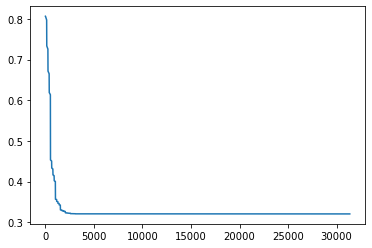

In [82]:
plt.plot(J0)

In [87]:
print("Time for ",iterasions," and ",learning_rate," : ",toc-tic)
print("Cost Function :",J)

Time for  1000000  and  0.0001  :  129.85149669647217
Cost Function : 0.32066102520849205


# Normal Equation method (Ordinary Least Squared)

In [88]:
w1 = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
h1 = np.dot(X,w1)
err = h1-Y
J1 = (err**2).mean()/2
print("J1

0.0036827971597222977

In [75]:
if J1>J :
    print("GD lebih baik dari OLS")
else :
    print("OLS lebih baik dari GD")

OLS lebih baik dari GD


in this case, OLS perform better then GD for Multivariate Linear Regression. 